In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [2]:
data = pd.read_csv('contraceptive_for_students.csv')

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

We perform basic data exploration and transform the contraceptive column from numbers to values. 

In [3]:
data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
data.isna().sum()

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

In [5]:
data = data.replace({'contraceptive': {1: 'No use', 2: 'Long-term', 3: 'Short-term'}})
data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,No use
1,45,1,3,10,1,1,3,4,0,No use
2,43,2,3,7,1,1,3,4,0,No use
3,42,3,2,9,1,1,3,3,0,No use
4,36,3,3,8,1,1,3,2,0,No use


We plot variables to try and identify any correlations between features and contraceptive method choice.

Text(0.5, 1.0, 'Distribution of womens contraceptive use based on wife education')

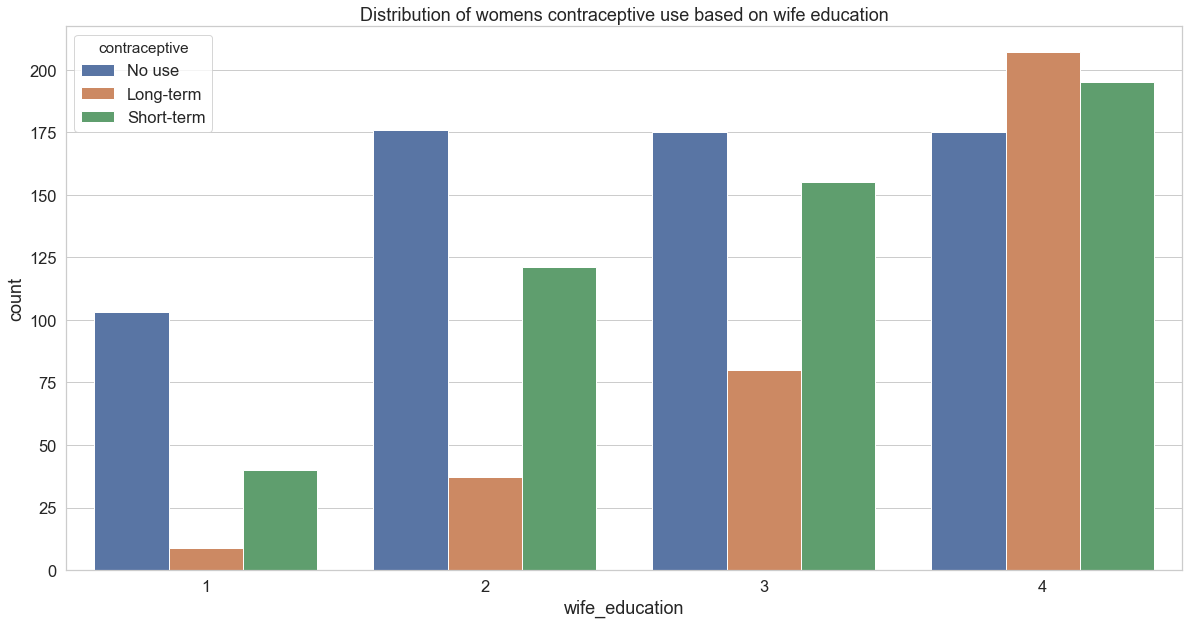

In [6]:
figsize=(20,10)
fig, ax = plt.subplots(1, figsize=figsize)
sns.countplot(x="wife_education", hue='contraceptive', data=data, ax = ax)
plt.title("Distribution of womens contraceptive use based on wife education")

Text(0.5, 1.0, "Distribution of woman's contraceptive use based on husband education")

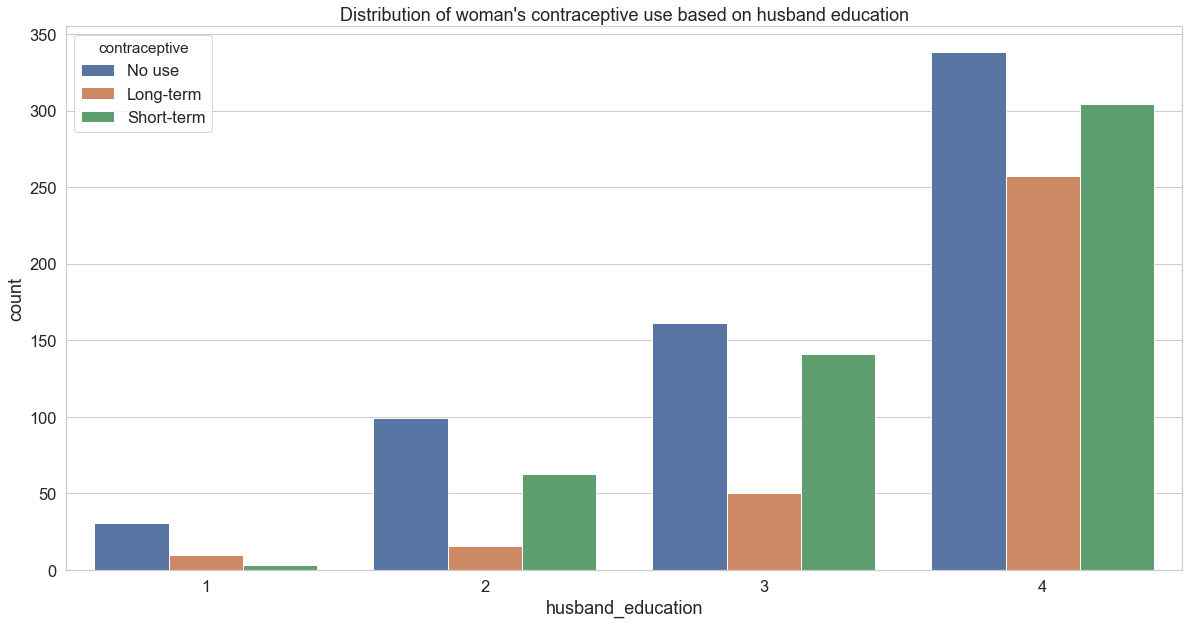

In [7]:
figsize=(20,10)
fig, ax = plt.subplots(1, figsize=figsize)
sns.countplot(x="husband_education", hue='contraceptive', data=data, ax = ax)
plt.title("Distribution of woman's contraceptive use based on husband education")

Text(0.5, 1.0, 'Distribution of contraceptive use based on wife religion')

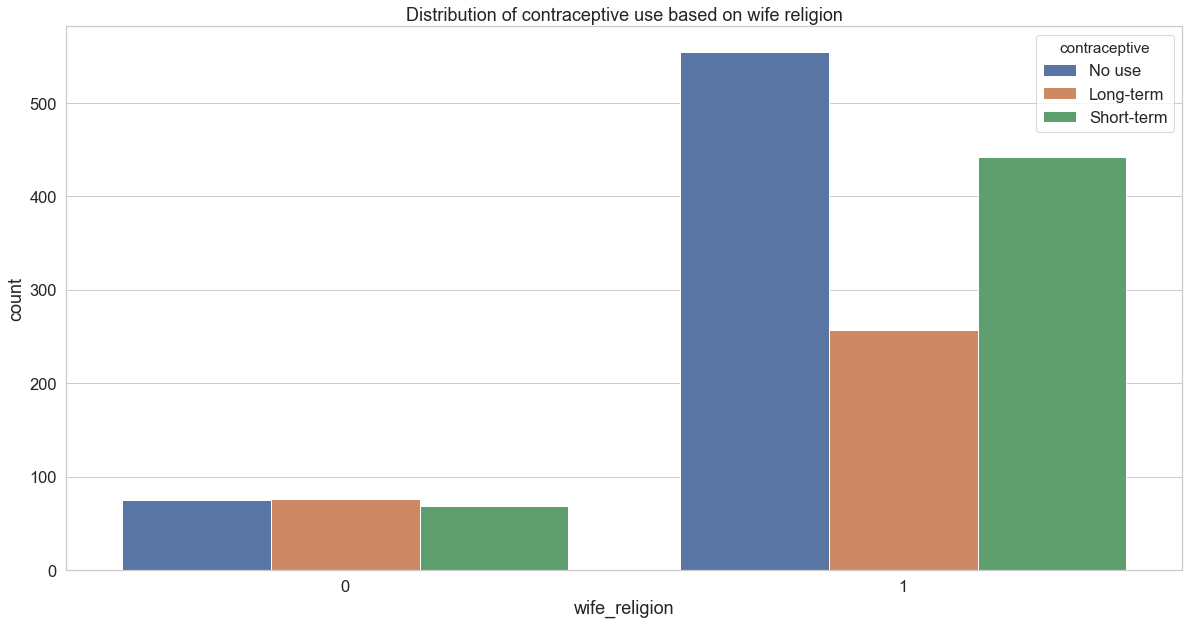

In [8]:
figsize=(20,10)
fig, ax = plt.subplots(1, figsize=figsize)
sns.countplot(x="wife_religion", hue='contraceptive', data=data, ax = ax)
plt.title("Distribution of contraceptive use based on wife religion")

Text(0.5, 1.0, 'Distribution of number of children of women based on contraceptive use')

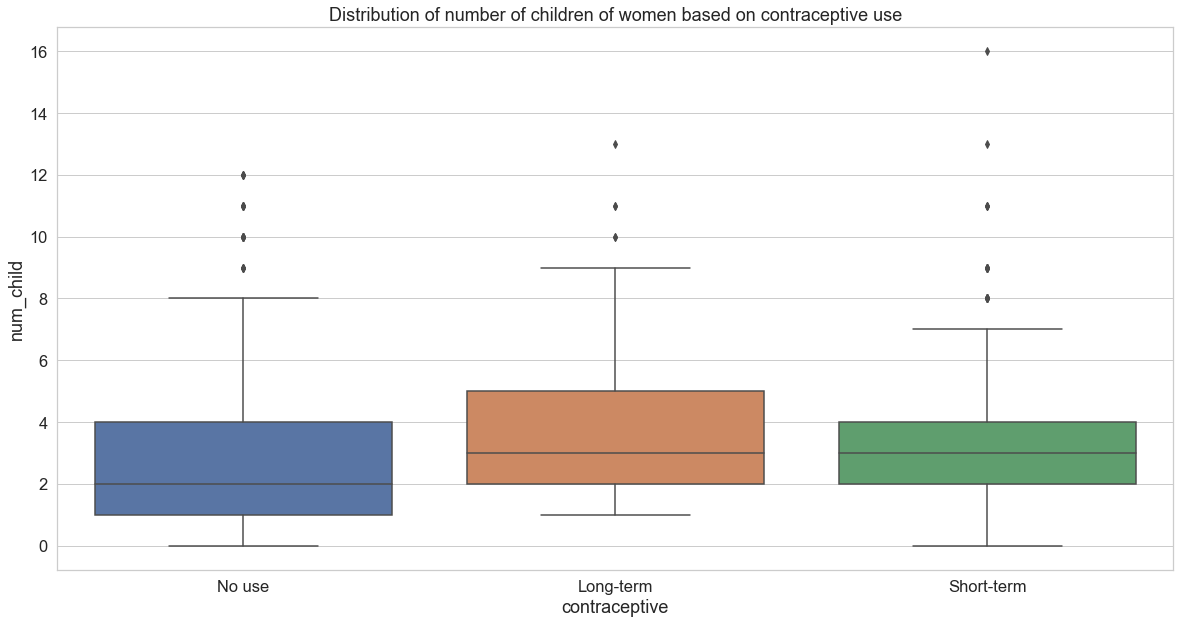

In [9]:
figsize=(20,10)
fig, ax = plt.subplots(1, figsize=figsize)
sns.boxplot(x="contraceptive", y="num_child", data=data, ax = ax)
plt.title("Distribution of number of children of women based on contraceptive use")

Text(0.5, 1.0, 'Distribution of number of children of women based on education and contraceptive use')

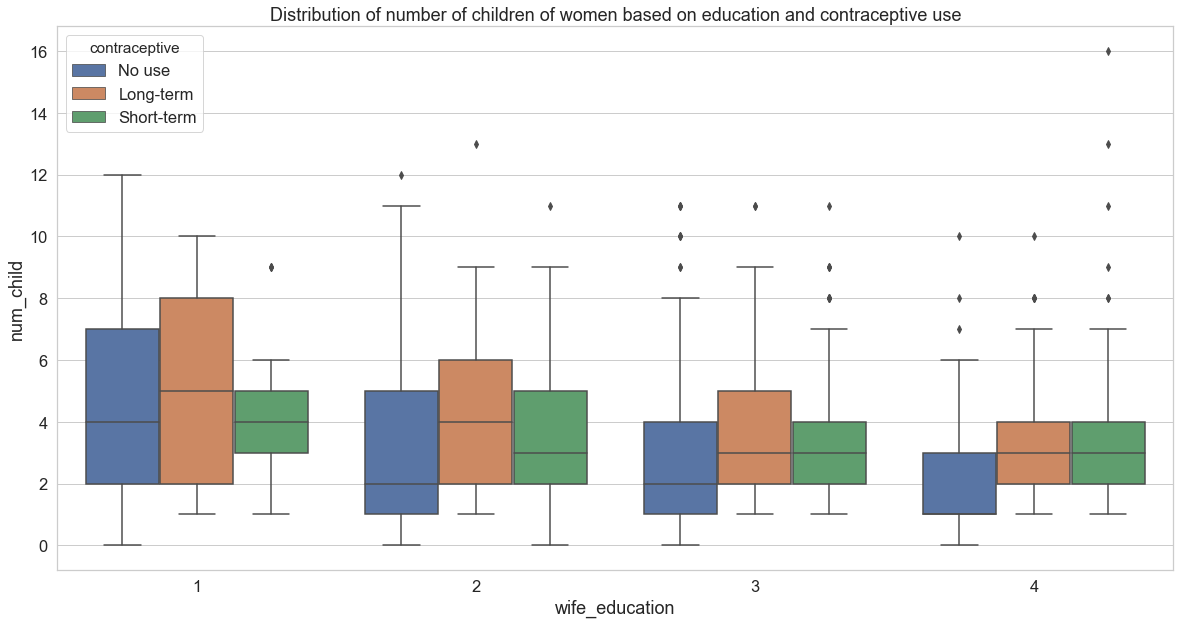

In [10]:
figsize=(20,10)
fig, ax = plt.subplots(1, figsize=figsize)
sns.boxplot(x="wife_education", y="num_child", hue="contraceptive", data=data, ax = ax)
plt.title("Distribution of number of children of women based on education and contraceptive use")

It's interesting that women who do not use contraceptives have on average fewer children across all education levels. 

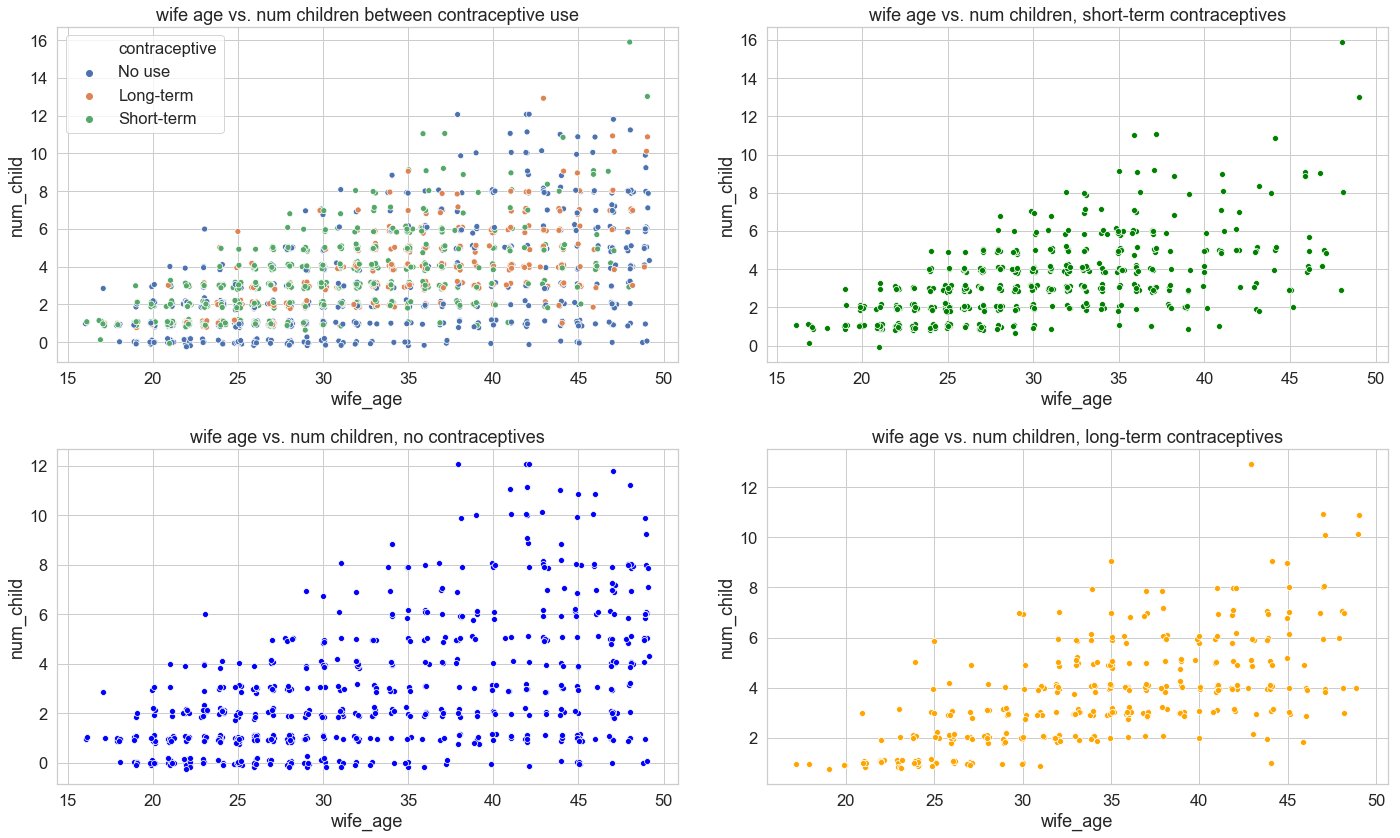

In [11]:
fig_dims = (20, 12)
x_jitter = data['wife_age'] + np.random.normal(0, 0.1, size=data['wife_age'].shape)
y_jitter = data['num_child'] + np.random.normal(0, 0.1, size=data['num_child'].shape)
scatter_data = pd.DataFrame(np.array([x_jitter, y_jitter, data['contraceptive']]).T)
scatter_data = scatter_data.rename(columns={0: 'wife_age', 1: 'num_child', 2: 'contraceptive'})

color_dict = dict({'No use':'blue',
                  'Long-term':'green',
                  'Short-term': 'orange'})

fig, ax = plt.subplots(2, 2, figsize=fig_dims)
ax[0, 0].title.set_text('wife age vs. num children between contraceptive use')
sns.scatterplot(x='wife_age', y='num_child', hue='contraceptive', data=scatter_data, ax=ax[0, 0])

no_use_x = scatter_data.loc[scatter_data['contraceptive'] == 'No use']['wife_age']
no_use_y = scatter_data.loc[scatter_data['contraceptive'] == 'No use']['num_child']
ax[1, 0].title.set_text('wife age vs. num children, no contraceptives')
sns.scatterplot(x=no_use_x, y=no_use_y, ax=ax[1, 0], color='blue')

no_use_x = scatter_data.loc[scatter_data['contraceptive'] == 'Short-term']['wife_age']
no_use_y = scatter_data.loc[scatter_data['contraceptive'] == 'Short-term']['num_child']
ax[0, 1].title.set_text('wife age vs. num children, short-term contraceptives')
sns.scatterplot(x=no_use_x, y=no_use_y, ax=ax[0, 1], color='green')

no_use_x = scatter_data.loc[scatter_data['contraceptive'] == 'Long-term']['wife_age']
no_use_y = scatter_data.loc[scatter_data['contraceptive'] == 'Long-term']['num_child']
ax[1, 1].title.set_text('wife age vs. num children, long-term contraceptives')
sns.scatterplot(x=no_use_x, y=no_use_y, ax=ax[1, 1], color='orange')

fig.tight_layout(pad=2.0)

There does not appear to be a significant difference in the age and number of children between women who use all three contraceptive types. In general, women tend to have fewer children when they are younger and more children when they are older. 

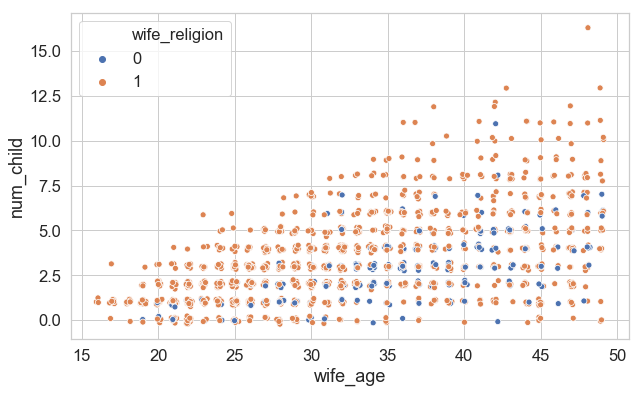

In [12]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
x_jitter = data['wife_age'] + np.random.normal(0, 0.1, size=data['wife_age'].shape)
y_jitter = data['num_child'] + np.random.normal(0, 0.1, size=data['num_child'].shape)
sns.scatterplot(x=x_jitter, y=y_jitter, hue='wife_religion', data=data)

In [13]:
print(data['contraceptive'].value_counts())

No use        629
Short-term    511
Long-term     333
Name: contraceptive, dtype: int64


One hot encode categorical variables and standardize quantitative variables.

In [14]:
categ = ['wife_education', 'husband_education', 'wife_religion', 'wife_work', 'husband_occupation', 'standard_living', 'media_exposure']
data_onehot = data[['wife_age', 'num_child', 'contraceptive']]
for c in categ:
    dummy = pd.get_dummies(data[c], prefix=c)
    data_onehot = pd.concat([data_onehot, dummy], axis=1)
data_onehot.head()

,wife_age,num_child,contraceptive,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,...,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1
0,24,3,No use,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,45,10,No use,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,43,7,No use,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,42,9,No use,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,36,8,No use,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [15]:
# add features, standardize quantitative variables
from sklearn.preprocessing import StandardScaler
data_onehot['wife_age^2'] = data_onehot['wife_age'] ** 2
data_onehot['num_child^2'] = data_onehot['num_child'] ** 2

data_onehot[['wife_age', 'num_child', 'wife_age^2', 'num_child^2']] = StandardScaler().fit_transform(data_onehot[['wife_age', 'num_child', 'wife_age^2', 'num_child^2']])
data_onehot.head()

C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,wife_age,num_child,contraceptive,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,...,husband_occupation_3,husband_occupation_4,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1,wife_age^2,num_child^2
0,-1.038167,-0.110856,No use,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,-0.988781,-0.311666
1,1.515194,2.858078,No use,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,1.614378,3.629904
2,1.272017,1.585678,No use,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,1.298191,1.420892
3,1.150428,2.433945,No use,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1.145486,2.806939
4,0.420897,2.009811,No use,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0.304715,2.070601


Split data into training and test data and begin testing different models. 

In [16]:
from sklearn.model_selection import train_test_split
X = data_onehot.drop('contraceptive', axis=1)
y = data_onehot['contraceptive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.head()

,wife_age,num_child,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,...,husband_occupation_3,husband_occupation_4,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1,wife_age^2,num_child^2
1302,0.664074,0.313277,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0.570600,-0.008469
1040,1.272017,-0.110856,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1.298191,-0.311666
1460,-1.281345,-0.959123,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,-1.154060,-0.658178
527,1.515194,1.585678,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,1.614378,1.420892
921,1.515194,-0.534990,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1.614378,-0.528236


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000, multi_class='ovr')
scores = cross_val_score(model, X_train, y_train, cv=5)
model = model.fit(X_train, y_train)
print('training acc: ', model.score(X_train, y_train))
print('validation acc: ', np.mean(scores))

training acc:  0.5679347826086957
validation acc:  0.5579273349861585


C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Terrance\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

Our validation accuracy is .55 with a simple one vs. rest logistic regression model. From here, we can explore new combinations of features, different hyperparamter values, or different models that may have better performance on our dataset. We can look to remove features that are not very correlated with our y variable if we begin to overfit. 

In [18]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
print(coefficients)

                       0         0         1         2
0               wife_age  0.265489 -0.211926  0.246668
1              num_child  1.479605 -2.186873  1.219618
2       wife_education_1 -1.220663  0.496332  0.052677
3       wife_education_2 -0.466372  0.457901 -0.255498
4       wife_education_3  0.329284 -0.087602 -0.199528
5       wife_education_4  0.923583 -0.867258  0.062303
6    husband_education_1  0.757295  0.121828 -1.028215
7    husband_education_2 -0.302166  0.017707  0.100040
8    husband_education_3 -0.376692 -0.224235  0.385001
9    husband_education_4 -0.512605  0.084074  0.203128
10       wife_religion_0 -0.008858 -0.273552 -0.060396
11       wife_religion_1 -0.425311  0.272926 -0.279650
12           wife_work_0 -0.164715  0.028100 -0.230313
13           wife_work_1 -0.269453 -0.028726 -0.109732
14  husband_occupation_1  0.037579  0.085910 -0.308434
15  husband_occupation_2 -0.446868  0.198821 -0.019770
16  husband_occupation_3 -0.326155  0.053055  0.024820
17  husban

With a logistic regression model, we can learn about the importance of each feature by looking at the coefficients. 

In [19]:
# take in a combination of features, y, and models, prints training and validation accuracy
def evaluate_features(X_array, y, model):
    accs = {}
    for name, features in X_array:
        scores = cross_val_score(model, features, y, cv=5)
        fitted = model.fit(features, y)
        training_acc = fitted.score(features, y)
        accs[name] =  'validation acc: ' + str(np.mean(scores)) + ', training acc: ' + str(training_acc)
    for k in accs:
        print(k, accs[k])
        print()

In [20]:
logi_model = LogisticRegression(C=1, max_iter=1000, solver='lbfgs', multi_class='ovr')
X_features = [['base', X_train],
              ['no wife_work', X_train.drop(['wife_work_0', 'wife_work_1'], axis=1)], 
              ['no media', X_train.drop(['media_exposure_1', 'media_exposure_0'], axis=1)],
              ['no media no work', X_train.drop(['wife_work_0', 'wife_work_1', 'media_exposure_1', 'media_exposure_0'], axis=1)]
          ]

evaluate_features(X_features, y_train, logi_model)

base validation acc: 0.5588364258952494, training acc: 0.5679347826086957

no wife_work validation acc: 0.5516251792722382, training acc: 0.5679347826086957

no media validation acc: 0.5534147145911852, training acc: 0.5706521739130435

no media no work validation acc: 0.5497947680300621, training acc: 0.5769927536231884



In [21]:
logi_model = LogisticRegression(C=.1, max_iter=1000, solver='lbfgs', multi_class='ovr')
X_features = [['base', X_train],
              ['no wife_work', X_train.drop(['wife_work_0', 'wife_work_1'], axis=1)], 
              ['no media', X_train.drop(['media_exposure_1', 'media_exposure_0'], axis=1)],
              ['no media no work', X_train.drop(['wife_work_0', 'wife_work_1', 'media_exposure_1', 'media_exposure_0'], axis=1)]
          ]

evaluate_features(X_features, y_train, logi_model)

base validation acc: 0.5398890828302593, training acc: 0.5625

no wife_work validation acc: 0.5380914316208434, training acc: 0.5615942028985508

no media validation acc: 0.5326409996998233, training acc: 0.5597826086956522

no media no work validation acc: 0.5389881819293584, training acc: 0.5579710144927537



In [22]:
logi_model = LogisticRegression(C=10, max_iter=1000, solver='lbfgs', multi_class='ovr')
X_features = [['base', X_train],
              ['no wife_work', X_train.drop(['wife_work_0', 'wife_work_1'], axis=1)], 
              ['no media', X_train.drop(['media_exposure_1', 'media_exposure_0'], axis=1)],
              ['no media no work', X_train.drop(['wife_work_0', 'wife_work_1', 'media_exposure_1', 'media_exposure_0'], axis=1)]
          ]

evaluate_features(X_features, y_train, logi_model)

base validation acc: 0.5515801156977627, training acc: 0.5652173913043478

no wife_work validation acc: 0.546166557343028, training acc: 0.5643115942028986

no media validation acc: 0.5497701609466316, training acc: 0.5697463768115942

no media no work validation acc: 0.5479683962036903, training acc: 0.572463768115942



Trying classification with an SVM instead. 

In [23]:
from sklearn.svm import SVC
svm_model = SVC(C=10, kernel='linear')
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5416498234145293, training acc: 0.5652173913043478

no wife_work validation acc: 0.5362322256439904, training acc: 0.5706521739130435

no media validation acc: 0.5479969315263433, training acc: 0.5697463768115942

no media no work validation acc: 0.5480092721269191, training acc: 0.5706521739130435



In [24]:
svm_model = SVC(C=1, kernel='linear')
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5425917114152409, training acc: 0.5751811594202898

no wife_work validation acc: 0.5452862241097535, training acc: 0.5760869565217391

no media validation acc: 0.5480256150844386, training acc: 0.5760869565217391

no media no work validation acc: 0.5543401113989349, training acc: 0.5661231884057971



In [25]:
svm_model = SVC(C=.1, kernel='linear')
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5371452447923036, training acc: 0.5643115942028986

no wife_work validation acc: 0.532612204965146, training acc: 0.5615942028985508

no media validation acc: 0.5416538998891939, training acc: 0.5679347826086957

no media no work validation acc: 0.5416538628303333, training acc: 0.5679347826086957



Data does not appear to be very linearly separable, does not appear to do much better than just guessing (33%)

In [26]:
svm_model = SVC(C=10,kernel='poly', gamma='scale', degree=2)
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5317155658332129, training acc: 0.6322463768115942

no wife_work validation acc: 0.5271210082974789, training acc: 0.6168478260869565

no media validation acc: 0.5280913945619827, training acc: 0.6304347826086957

no media no work validation acc: 0.5280422915717033, training acc: 0.6204710144927537



In [27]:
svm_model = SVC(C=1,kernel='poly', gamma='scale', degree=2)
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5471289388936448, training acc: 0.592391304347826

no wife_work validation acc: 0.5543729826082766, training acc: 0.5887681159420289

no media validation acc: 0.5552819623407859, training acc: 0.5860507246376812

no media no work validation acc: 0.5434721187662364, training acc: 0.5851449275362319



In [28]:
svm_model = SVC(C=.1,kernel='poly', gamma='scale', degree=2)
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.43570076452429396, training acc: 0.46195652173913043

no wife_work validation acc: 0.4347875971405383, training acc: 0.45742753623188404

no media validation acc: 0.43568438450791386, training acc: 0.4628623188405797

no media no work validation acc: 0.433894923306688, training acc: 0.45108695652173914



In [29]:
svm_model = SVC(C=10,kernel='rbf', gamma='scale')
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5380133856604445, training acc: 0.6793478260869565

no wife_work validation acc: 0.5398235257058787, training acc: 0.6766304347826086

no media validation acc: 0.5398193751134928, training acc: 0.6811594202898551

no media no work validation acc: 0.5380258374376021, training acc: 0.6711956521739131



In [30]:
svm_model = SVC(C=1,kernel='rbf', gamma='scale')
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5489471207118266, training acc: 0.5969202898550725

no wife_work validation acc: 0.5489225877461171, training acc: 0.5978260869565217

no media validation acc: 0.5444017032252326, training acc: 0.5996376811594203

no media no work validation acc: 0.5434639287580464, training acc: 0.6023550724637681



In [31]:
svm_model = SVC(C=.1,kernel='rbf', gamma='scale')
evaluate_features(X_features, y_train, svm_model)

base validation acc: 0.5009458532987945, training acc: 0.5244565217391305

no wife_work validation acc: 0.5072930725871903, training acc: 0.5398550724637681

no media validation acc: 0.5000203823733236, training acc: 0.5289855072463768

no media no work validation acc: 0.5054585107526284, training acc: 0.5407608695652174



Tried 1 logistic regression model and 3 types of SVMs with different kernels, all with varying values of the C hyperparameter. 

In [32]:
#random forest model
from sklearn import tree
from sklearn import ensemble
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)
evaluate_features(X_features, y_train, random_forest_model)

base validation acc: 0.5199547511312217, training acc: 0.9583333333333334

no wife_work validation acc: 0.5053970301029125, training acc: 0.9420289855072463

no media validation acc: 0.5144798233033527, training acc: 0.9592391304347826

no media no work validation acc: 0.5126246567423038, training acc: 0.9375



To visualize the random forest, we will train it on two features, wife_age^2 and num_child^2 and plot the resulting decision boundaries. 

0.6413043478260869


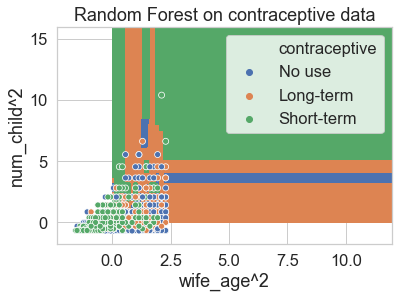

In [35]:
from sklearn import ensemble

sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
random_forest_model_trial = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)
random_forest_model_trial.fit(X_train[['wife_age^2', 'num_child^2']], y_train)
xx, yy = np.meshgrid(np.arange(0, 12, 0.02), np.arange(0, 16, 0.02))
Z_string = random_forest_model_trial.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data=data_onehot, x='wife_age^2', y = 'num_child^2', hue = 'contraceptive')
plt.title('Random Forest on contraceptive data')
print(random_forest_model_trial.score(X_train[['wife_age^2', 'num_child^2']], y_train))

In [41]:
#Using the best hyperparameters for each model, run the models on the test data. 
svm_model = SVC(C=1,kernel='rbf', gamma='auto').fit(X_train, y_train)
print('SVM rbf test acc: ', svm_model.score(X_test, y_test))

svm_model = SVC(C=1,kernel='poly', degree=2, gamma='auto').fit(X_train, y_train)
print('SVM 2 deg poly test acc: ', svm_model.score(X_test, y_test))

svm_model = SVC(C=1, kernel='linear').fit(X_train, y_train)
print('SVM linear test acc: ', svm_model.score(X_test, y_test))

logi_model = LogisticRegression(C=10, max_iter=1000, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
print('Logistic Regression test acc: ', logi_model.score(X_test, y_test))

ran_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42).fit(X_train, y_train)
print('Random Forest test acc: ', ran_forest_model.score(X_test, y_test))


SVM rbf test acc:  0.5799457994579946
SVM 2 deg poly test acc:  0.5528455284552846
SVM linear test acc:  0.5636856368563685
Logistic Regression test acc:  0.5745257452574526
Random Forest test acc:  0.5474254742547425


[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'model')]

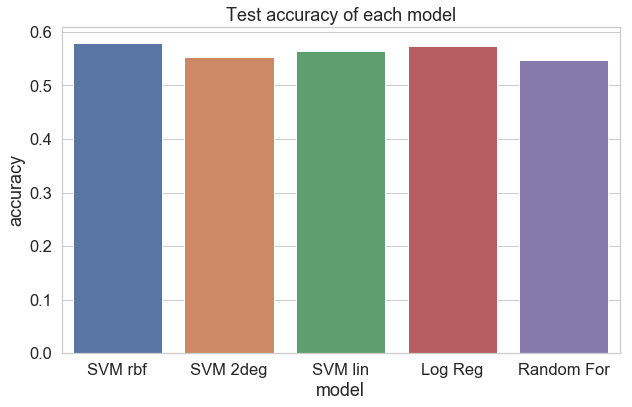

In [47]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
x = ['SVM rbf', 'SVM 2deg', 'SVM lin', 'Log Reg', 'Random For']
y = [0.5799457994579946, 0.5528455284552846, 0.5636856368563685, 0.5745257452574526, 0.5474254742547425]
ax = sns.barplot(x=x, y=y)
plt.title('Test accuracy of each model')
ax.set(xlabel='model', ylabel='accuracy')